# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [45]:
import requests
import json

cotacao = requests.get('https://economia.awesomeapi.com.br/json/all')

print(cotacao)

moedas = cotacao.json()

print(moedas)

<Response [200]>
{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.3414', 'low': '5.2976', 'varBid': '0.0366', 'pctChange': '0.69', 'bid': '5.3332', 'ask': '5.3346', 'timestamp': '1679662032', 'create_date': '2023-03-24 09:47:12'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.36', 'low': '5.31', 'varBid': '0.05', 'pctChange': '0.94', 'bid': '5.2', 'ask': '5.52', 'timestamp': '1679660640', 'create_date': '2023-03-24 09:24:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.8703', 'low': '3.8417', 'varBid': '0.0059', 'pctChange': '0.15', 'bid': '3.8665', 'ask': '3.869', 'timestamp': '1679662031', 'create_date': '2023-03-24 09:47:11'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.5251', 'low': '6.4598', 'varBid': '0.0068', 'pctChange': '0.1', 'bid': '6.5126', 'ask': '6.5163', 'timestamp': '1

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [47]:
print('Dólar: {}'.format(moedas['USD']['bid']))
print('Euro: {}'.format(moedas['EUR']['bid']))
print('Bitcoin: {}'.format(moedas['BTC']['bid']))

Dólar: 5.3332
Euro: 5.7331
Bitcoin: 149695


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [52]:
cotacaodolar_30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacaodolar_30dict = cotacaodolar_30d.json()

lista_cotacao_dolar = [item['bid'] for item in cotacaodolar_30dict]

print(lista_cotacao_dolar)


['5.3231', '5.2979', '5.2369', '5.2424', '5.2368', '5.2748', '5.2793', '5.2798', '5.2307', '5.288', '5.2534', '5.2467', '5.2166', '5.2166', '5.2166', '5.1645', '5.1453', '5.191', '5.1534', '5.1956', '5.1926', '5.2006', '5.1794', '5.2367', '5.2008', '5.2097', '5.1373', '5.1522', '5.1675', '5.1674']


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [66]:
cotacaoBTC = requests.get('https://economia.awesomeapi.com.br/BTC/200?start_date=20200101&end_date=20201031')
historicobtc = cotacaoBTC.json()
historicobtc = [float(item['bid']) for item in historicobtc]
historicobtc.reverse()

#### Gráfico com as cotações do BitCoin

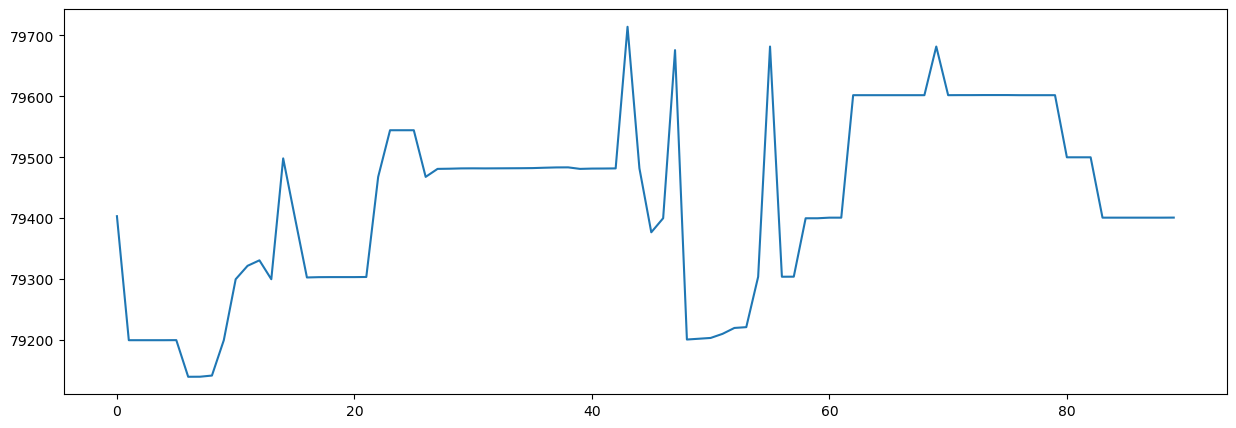

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(historicobtc)
plt.show()